<a href="https://colab.research.google.com/github/MOOwuttichai/project_dataWDkku/blob/main/Project1_66_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. นายวุฒิชัย คำนา 643020521-0 wuttichai.kha@kkumail.com
2. <Name> <ID> <Email>
3. <Name> <ID> <Email>

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [ ]:
# read the file
file = open('/content/drive/MyDrive/stats work/thailand_tweets.txt','r') # rename
thai = file.read()
d = json.loads(thai)

In [259]:
# inspect the file
print(type(d))
#d


<class 'str'>


In [ ]:
#thai_json["hashtags"]

In [260]:
thai_json = json.loads(d)
#thai_json

In [ ]:
first_tweet=list(thai_json.keys())[0]

#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
thai_pd = pd.read_json(StringIO(d), orient='index')

In [ ]:
thai_pd.head(5)

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

report
total_number = "29" 
The content of the first tweet is "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. "
Is the first tweet contained any hashtags is "[]" and Is the first tweet contained any mentions is "[]"
Collect all hashtags related to Thailand is [[['thailand', 'pattaya'], ['4', 'ohmpawat', 'ย'], ['pattaya', 'Thailand'], ['SDA2022', 'voteforppkritt', 'ppkritt'], ['เปกผล', 'PeckPaLitChoke'], ['LISA', 'LALISA', 'Money']]]
the most popular tweetswith the largest number of retweet is
                                          tweet_id  \
2019-08-02 16:47:25.825458181  1564764445825458176   
2019-08-02 16:12:21.324992513  1564762341324992512   
2019-08-02 16:35:29.967054848  1564763729967054848   
2019-08-02 16:28:12.354355200  1564763292354355200   
2019-08-02 16:26:25.244426240  1564763185244426240   
2019-08-02 16:40:28.014313472  1564764028014313472   
2019-08-02 16:46:01.742110720  1564764361742110720   
2019-08-02 16:38:27

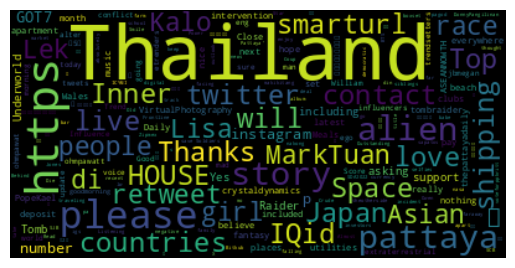

In [ ]:
# ----------------- Your code here -----------------
# 1
total_number = thai_pd['tweet_id'].count()
# 2
content_first = thai_pd['content'][0]
# or first_tweet=list(thai_json.keys())[0]
# thai_json[first_tweet]['content']
# 3
hashtags = thai_pd['hashtags'][0]
mentions = thai_pd['mentions'][0]
#thai_json[first_tweet]['hashtags']
# 4
has_list = [[thai_pd['hashtags'][2],thai_pd['hashtags'][5],thai_pd['hashtags'][11],thai_pd['hashtags'][12],thai_pd['hashtags'][-4],thai_pd['hashtags'][-10]]]
# 5
metric = thai_pd[['tweet_id','name','username','retweets']]
Report_five = metric.reindex().sort_values(by='retweets',ascending = False)
# 6
Report_six = Report_five.head(5)
# 7
contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
my_stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=my_stopwords).generate(contents)
print('report')
print(f'total_number = "{total_number}" ')
print(f'The content of the first tweet is "{content_first}"')
print(f'Is the first tweet contained any hashtags is "{hashtags}" and Is the first tweet contained any mentions is "{mentions}"')
print(f'Collect all hashtags related to Thailand is {has_list}')
print('the most popular tweetswith the largest number of retweet is')
print(Report_five)
print('the top 5 tweets that are the most popular is')
print(Report_six)
print('Create a word cloud of words in the contents')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#Test code

---





In [261]:
#thai_json.keys()

In [ ]:
contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
print(contents)
my_stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=my_stopwords).generate(contents)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
flat_list = [item for sublist in list(thai_json.keys()) for item in sublist]
#flat_list

In [262]:
has_list = []
for i in list(thai_json.keys()):
  L = thai_json[i]['hashtags']
  has_list.append(L)
flat_list = [item for sublist in has_list for item in sublist]
#flat_list

In [263]:
show_has_list=thai_pd[thai_pd['hashtags'] == '[has_list]']
#show_has_list

In [ ]:
def showHashtag(data) :
   i = 0;
   obj = JSON.parse(data);
   console.log(obj.hashtags[i].text);


In [ ]:
#list(thai_json.keys())

In [ ]:
L_1 = thai_json['1564764845685280772']['hashtags']
len(L_1)

2

In [ ]:
L = [['1','2','3'],'2','3',['6','7']]
flat_list = [item for sublist in L for item in sublist]
flat_list

['1', '2', '3', '2', '3', '6', '7']



---



In [ ]:
#dict.fromkeys(has_list)

Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [ ]:
import spacy
from spacy import displacy
from spacy.pipeline.textcat_multilabel  import DEFAULT_MULTI_TEXTCAT_MODEL
from spacy.pipeline.textcat  import DEFAULT_SINGLE_TEXTCAT_MODEL
from spacy.training import Example
import random
import numpy as np
import pandas as pd
#import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix , f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC
#nltk downloads
import nltk
nltk.download(['punkt', 'wordnet', 'omw-1.4', 'stopwords'])
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
reviews = pd.read_csv('/content/drive/MyDrive/stats work/tripadvisor_hotel_reviews.csv')
positive_reviews = reviews[reviews['Rating']>3]
neural_reviews = reviews[reviews['Rating']==3]
negative_reviews = reviews[reviews['Rating']<3]
positive_reviews['sentiment'] = 'positive'
positive_reviews['num'] = range(len(positive_reviews))
neural_reviews['sentiment'] = 'neural'
neural_reviews['num'] = range(len(neural_reviews))
negative_reviews['sentiment'] = 'negative'
negative_reviews['num'] = range(len(negative_reviews))
datacon = pd.concat([positive_reviews,neural_reviews,negative_reviews])
# combine tweet texts in each type
positive_reviews_combine = " ".join([positive_reviews.iloc[key,0] for key in positive_reviews['num']])
neural_reviews_combine = " ".join([neural_reviews.iloc[key,0] for key in neural_reviews['num']])
negative_reviews_combine = " ".join([negative_reviews.iloc[key,0] for key in negative_reviews['num']])
###contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
# tokenize texts
P_tokens_ = [t for t in positive_reviews_combine.split()]
NR_tokens = [t for t in neural_reviews_combine.split()]
NG_tokens = [t for t in negative_reviews_combine.split()]
# convert to lower case
P_lower = positive_reviews_combine.lower()
NR_lower = neural_reviews_combine.lower()
NG_lower = negative_reviews_combine.lower()
# remove stop words
my_stopwords = set(STOPWORDS)
clean_P_text = ' '.join([word for word in P_lower.split() if word not in (my_stopwords)])
clean_NR_text = ' '.join([word for word in NR_lower.split() if word not in (my_stopwords)])
clean_NG_text = ' '.join([word for word in NG_lower.split() if word not in (my_stopwords)])
clean_P_tokens = [t for t in clean_P_text.split()]
clean_NR_tokens = [t for t in clean_NR_text.split()]
clean_NG_tokens = [t for t in clean_NG_text.split()]
# remove any other stop words, like RT
new_my_stopwords = set(STOPWORDS)
new_my_stopwords.update(['anyone','runnnnnnn','much/','mary/'])
N_clean_P_text = ' '.join([word for word in P_lower.split() if word not in (new_my_stopwords)])
N_clean_NR_text = ' '.join([word for word in NR_lower.split() if word not in (new_my_stopwords)])
N_clean_NG_text = ' '.join([word for word in NG_lower.split() if word not in (new_my_stopwords)])
N_clean_P_tokens = [t for t in N_clean_P_text.split()]
N_clean_NR_tokens = [t for t in N_clean_NR_text.split()]
N_clean_NG_tokens = [t for t in N_clean_NG_text.split()]
print(len(my_stopwords))
print(len(new_my_stopwords))
#print(len(clean_P_tokens))
#print(len(N_clean_P_tokens))
# remove punctuations
import string
R_punctuations_my_stopwords = set(STOPWORDS)
R_punctuations_my_stopwords.update(['anyone','runnnnnnn','much','mary'])
P_text_R_punctuations = P_lower.translate(str.maketrans('', '', string.punctuation))
NR_text_R_punctuations = NR_lower.translate(str.maketrans('', '', string.punctuation))
NG_text_R_punctuations = NG_lower.translate(str.maketrans('', '', string.punctuation))
N2_clean_P_text = ' '.join([word for word in P_text_R_punctuations.split() if word not in (R_punctuations_my_stopwords)])
N2_clean_NR_text = ' '.join([word for word in NR_text_R_punctuations.split() if word not in (R_punctuations_my_stopwords)])
N2_clean_NG_text = ' '.join([word for word in NG_text_R_punctuations.split() if word not in (R_punctuations_my_stopwords)])
N2_clean_P_tokens = [t for t in N2_clean_P_text.split()]
N2_clean_NR_tokens = [t for t in N2_clean_NR_text.split()]
N2_clean_NG_tokens = [t for t in N2_clean_NG_text.split()]
#print(len(N_clean_P_tokens))
#print(len(N2_clean_P_tokens))
# remove other symbols?
P_text_nosymbols = P_text_R_punctuations.translate(str.maketrans('', '', '^çéîæù©äèâ¾'))
NR_text_nosymbols = NR_text_R_punctuations.translate(str.maketrans('', '', '^çéîæù©äèâ¾'))
NG_text_nosymbols = NG_text_R_punctuations.translate(str.maketrans('', '', '^çéîæù©äèâ¾'))
N3_clean_P_text = ' '.join([word for word in P_text_nosymbols.split() if word not in (R_punctuations_my_stopwords)])
N3_clean_NR_text = ' '.join([word for word in NR_text_nosymbols.split() if word not in (R_punctuations_my_stopwords)])
N3_clean_NG_text = ' '.join([word for word in NG_text_nosymbols.split() if word not in (R_punctuations_my_stopwords)])
N3_clean_P_tokens = [t for t in N3_clean_P_text.split()]
N3_clean_NR_tokens = [t for t in N3_clean_NR_text.split()]
N3_clean_NG_tokens = [t for t in N3_clean_NG_text.split()]
# analyze word frequency in each sentiment type and so on
freq_P = nltk.FreqDist(N3_clean_P_tokens)
#for key,val in freq_P.items():
    #print(str(key) + ':' + str(val))
print(" ")
freq_P.plot(20, cumulative=False)
print(" ")
#--------------------------------------------------
freq_NR = nltk.FreqDist(N3_clean_NR_tokens)
#for key,val in freq_NR.items():
    #print(str(key) + ':' + str(val))
print(" ")
freq_NR.plot(20, cumulative=False)
print(" ")
#--------------------------------------------------
freq_NG = nltk.FreqDist(N3_clean_NG_tokens)
#for key,val in freq_NG.items():
    #print(str(key) + ':' + str(val))
print(" ")
freq_NG.plot(20, cumulative=False)
print(" ")
#--------------------------------------------------
# create some data visualization for the analysis and your presentation



<ipython-input-253-3f044be065b5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['sentiment'] = 'positive'
<ipython-input-253-3f044be065b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['num'] = range(len(positive_reviews))
<ipython-input-253-3f044be065b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

192
196


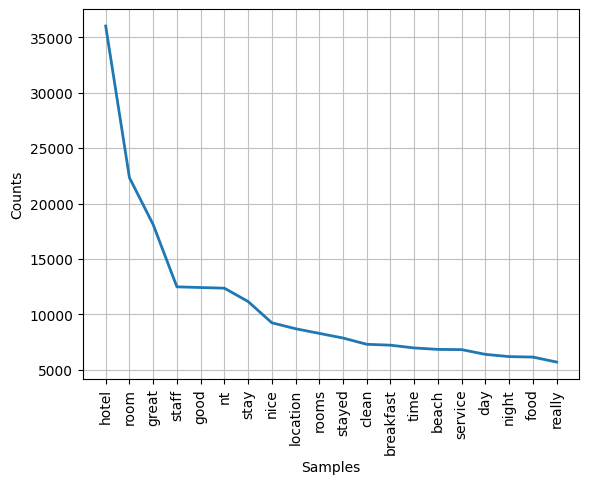

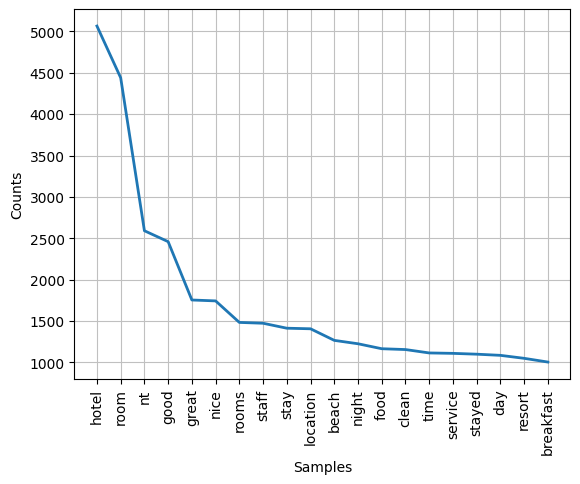

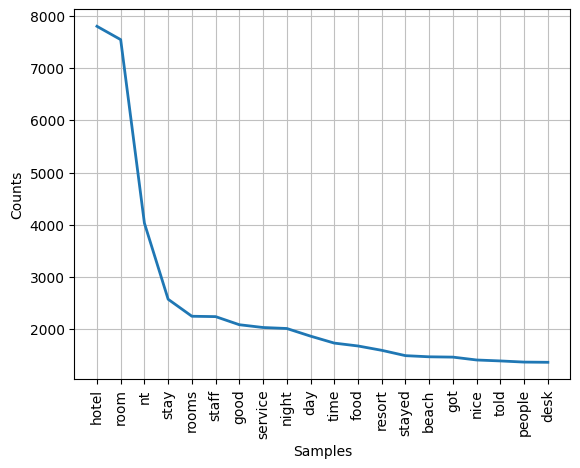

In [ ]:
# analyze word frequency in each sentiment type and so on
freq_P = nltk.FreqDist(N3_clean_P_tokens)
#for key,val in freq_P.items():
    #print(str(key) + ':' + str(val))
print(" ")
freq_P.plot(20, cumulative=False)
print(" ")
#--------------------------------------------------
freq_NR = nltk.FreqDist(N3_clean_NR_tokens)
#for key,val in freq_NR.items():
    #print(str(key) + ':' + str(val))
print(" ")
freq_NR.plot(20, cumulative=False)
print(" ")
#--------------------------------------------------
freq_NG = nltk.FreqDist(N3_clean_NG_tokens)
#for key,val in freq_NG.items():
    #print(str(key) + ':' + str(val))
print(" ")
freq_NG.plot(20, cumulative=False)
print(" ")
#--------------------------------------------------

In [ ]:
print(len(N2_clean_P_tokens))
print(len(N3_clean_P_tokens))

1450746
1450239


In [ ]:
#N_clean_P_text

In [ ]:
#P_text_R_punctuations

In [ ]:
#P_text_nosymbols

In [264]:
#freq = nltk.FreqDist(N2_clean_P_text)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))

In [265]:
#freq = nltk.FreqDist(P_text_nosymbols)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))

In [ ]:
#positive_reviews_combine

In [266]:
#N2_clean_P_text

### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here




### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️

In [267]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
#reviews = pd.read_csv('/content/drive/MyDrive/stats work/tripadvisor_hotel_reviews.csv')
#positive_reviews = reviews[reviews['Rating']>3]
#neural_reviews = reviews[reviews['Rating']==3]
#negative_reviews = reviews[reviews['Rating']<3]
#positive_reviews['sentiment'] = 'positive'
#positive_reviews['num'] = range(len(positive_reviews))
#neural_reviews['sentiment'] = 'neural'
#neural_reviews['num'] = range(len(neural_reviews))
#negative_reviews['sentiment'] = 'negative'
#negative_reviews['num'] = range(len(negative_reviews))
#datacon = pd.concat([positive_reviews,neural_reviews,negative_reviews])
# combine tweet texts in each type
#positive_reviews_combine = " ".join([positive_reviews.iloc[key,0] for key in positive_reviews['num']])
#neural_reviews_combine = " ".join([neural_reviews.iloc[key,0] for key in neural_reviews['num']])
#negative_reviews_combine = " ".join([negative_reviews.iloc[key,0] for key in negative_reviews['num']])
###contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
# tokenize texts
#P_tokens = [t for t in positive_reviews_combine.split()]
#NR_tokens = [t for t in neural_reviews_combine.split()]
#NG_tokens = [t for t in negative_reviews_combine.split()]
# convert to lower case
#P_lower = positive_reviews_combine.lower()
#NR_lower = neural_reviews_combine.lower()
#NG_lower = negative_reviews_combine.lower()
# remove stop words
#my_stopwords = set(STOPWORDS)
#clean_P_text = ' '.join([word for word in P_lower.split() if word not in (my_stopwords)])
#clean_NR_text = ' '.join([word for word in P_lower.split() if word not in (my_stopwords)])
#clean_NG_text = ' '.join([word for word in P_lower.split() if word not in (my_stopwords)])
#clean_P_tokens = [t for t in clean_P_text.split()]
#clean_NR_tokens = [t for t in clean_NR_text.split()]
#clean_NG_tokens = [t for t in clean_NG_text.split()]
# remove any other stop words, like RT
#N_my_stopwords=my_stopwords.add(['anyone','much'])
#N_clean_P_text = ' '.join([word for word in P_lower.split() if word not in (N_my_stopwords)])
#N_clean_NR_text = ' '.join([word for word in P_lower.split() if word not in (N_my_stopwords)])
#N_clean_NG_text = ' '.join([word for word in P_lower.split() if word not in (N_my_stopwords)])
#N_clean_P_tokens = [t for t in N_clean_P_text.split()]
#N_clean_NR_tokens = [t for t in N_clean_NR_text.split()]
#N_clean_NG_tokens = [t for t in N_clean_NG_text.split()]
# remove punctuations

# remove other symbols?

# analyze word frequency in each sentiment type and so on

# create some data visualization for the analysis and your presentation



